# GDP与全社会用电量

## 导入和处理数据 

### 导入数据 

&emsp;&emsp;首先，从 Excel 文件中导入所需的数据：

In [1]:
clear all // 清空内存
import excel using "E:\求职\笔试\GDP和用电量.xlsx", sheet("GDP与全社会用电量") firstrow clear // 导入数据
list in 1/10 // 展示前 10 个数据
ds, detail // 查看变量详细情况 





     +--------------------------+
     | year       gdp        ec |
     |--------------------------|
  1. | 1980   4267.03    3006.3 |
  2. | 1981   4484.65   3204.72 |
  3. | 1982   4888.27   3300.86 |
  4. | 1983    5416.2   3498.91 |
  5. | 1984   6239.46   3754.33 |
     |--------------------------|
  6. | 1985   7075.55    4117.6 |
  7. | 1986   7705.27      4507 |
  8. | 1987   8606.79    4985.2 |
  9. | 1988   9570.75    5466.8 |
 10. | 1989   9972.72    5865.3 |
     +--------------------------+


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year            int     %10.0g                year
gdp             double  %10.0g                gdp
ec              double  %

### 处理数据

&emsp;&emsp;在 Stata 中变量名必须是英文名，因此为了方便理解变量的含义，可以给变量添加标签：

In [2]:
label data "数据来源：国家统计局和中国统计年鉴"
label var year "年份"
label var gdp "国内生产总值（亿元）"
label var ec "用电量（亿千瓦时）"

In [3]:
format year %ty
tsset year



        time variable:  year, 1980 to 2019
                delta:  1 year


## 相关性分析

&emsp;&emsp;相关性分析方法包括计算相关系数矩阵和自相关检验等，前者主要是考察变量之间的关系，后者主要是考察单个变量的自相关性。

### 计算相关系数矩阵

In [4]:
gen lngdp = log(gdp)
gen lnec = log(ec)
gen Dlngdp = D.lngdp
gen D2lngdp = D2.lngdp
gen Dlnec = D.lnec
gen D2lnec = D2.lnec

pwcorr_a lngdp lnec Dlngdp D2lngdp Dlnec D2lnec, star1(0.01) star5(0.05) star10(0.1)




(1 missing value generated)

(2 missing values generated)

(1 missing value generated)

(2 missing values generated)


             |    lngdp     lnec   Dlngdp  D2lngdp    Dlnec   D2lnec
-------------+------------------------------------------------------
       lngdp |   1.000   
        lnec |   0.998***  1.000   
      Dlngdp |  -0.251    -0.250     1.000   
     D2lngdp |  -0.169    -0.156     0.429***  1.000   
       Dlnec |  -0.008    -0.004     0.545***  0.205     1.000   
      D2lnec |  -0.087    -0.098     0.183     0.445***  0.422***  1.000   


&emsp;&emsp;整理得：

|原序列|一阶差分序列|二阶差分序列|
|--|--|--|
|0.998***|0.545***|0.445***|

&emsp;&emsp;从上表可知 GDP 与电力消费存在着较高的正相关性，因此可以认为二者可能存在协整关系。

### 自相关检验

&emsp;&emsp;在时间序列数据中，经常会出现自相关现象，此时传统 OLS 方法失效。

In [5]:
qui reg lngdp lnec
estat bgodfrey




Breusch-Godfrey LM test for autocorrelation
---------------------------------------------------------------------------
    lags(p)  |          chi2               df                 Prob > chi2
-------------+-------------------------------------------------------------
       1     |         30.835               1                   0.0000
---------------------------------------------------------------------------
                        H0: no serial correlation


&emsp;&emsp;明显，可以在 1% 的显著性水平上拒绝“无自相关”的原假设，表明存在自相关问题。

## 平稳性：单位根检验

&emsp;&emsp;对于协整分析，要求两个时间序列的数据同为“d 阶单整”，所谓“d 阶单整”是指时间序列的 d 阶差分为平稳过程。[^1]

[^1]: 陈强 第409页

### 图示法：简单查看数据的平稳性

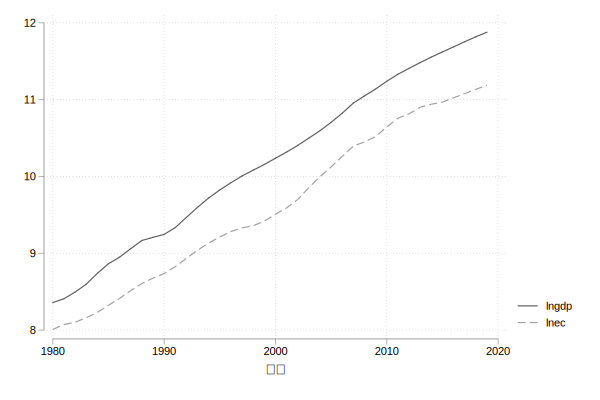

In [6]:
tsline lngdp lnec

### 单位根检验：ADF 和 PP

&emsp;&emsp;单位根检验的主要方法包括: DF检验、ADF检验、PP检验、DF-GLS 检验和 KPSS检验，在此主要采用 ADF 检验和 PP 检验。

#### ADF 检验

In [7]:
dfuller lngdp, lags(2)  trend
dfuller D1.lngdp, lags(2) trend
dfuller D2.lngdp, lags(2) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        37

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.141            -4.270            -3.552            -3.211
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9219


Augmented Dickey-Fuller test for unit root         Number of obs   =        36

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

In [8]:
dfuller lnec, lags(4) trend
dfuller D1.lnec, lags(4) trend
dfuller D2.lnec, lags(4) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        35

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.912            -4.288            -3.560            -3.216
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.6485


Augmented Dickey-Fuller test for unit root         Number of obs   =        34

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

#### PP 检验

In [9]:
pperron lngdp, lags(5) trend
pperron D.lngdp, lags(5) trend
pperron D2.lngdp, lags(5) trend



Phillips-Perron test for unit root                 Number of obs   =        39
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(rho)           -3.863           -24.292           -18.964           -16.272
 Z(t)             -0.910            -4.251            -3.544            -3.206
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9550


Phillips-Perron test for unit root                 Number of obs   =        38
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------


In [10]:
pperron lnec, lags(5) trend
pperron D.lnec, lags(5) trend
pperron D2.lnec, lags(5) trend



Phillips-Perron test for unit root                 Number of obs   =        39
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(rho)           -8.450           -24.292           -18.964           -16.272
 Z(t)             -2.001            -4.251            -3.544            -3.206
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.6010


Phillips-Perron test for unit root                 Number of obs   =        38
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------


#### 汇总结果

&emsp;&emsp;整理得：

|变量|ADF检验值|PP检验值|
|--|--|--|
|lngdp|-1.141|-0.91|
|lnec|-1.912|-2.001|
|D1.lngdp|-3.026|-3.521|
|D1.lnec|-2.483|-2.59|
|D2.lngdp|-4.471**|-5.24***|
|D2.lnec|-4.111**|-6.709***|
** 以置信水平 5% 拒绝序列非平稳性的原假设
*** 以置信水平 1% 拒绝序列非平稳性的原假设

&emsp;&emsp;易知，lngdp 序列和 lnec 序列均为二阶单整序列，即 lngdp ~ I(2) 和 lnec ~ I(2)。

## 协整检验

&emsp;&emsp;协整检验的主要方法包括两个：EG-ADF 方法和 JJ（Johansen-Juselius）协整检验法。 

### EG-ADF 协整检验

In [11]:
qui reg lngdp lnec, nocons
predict e, residu
dfuller e, nocons lags(3)





Augmented Dickey-Fuller test for unit root         Number of obs   =        36

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.686            -2.642            -1.950            -1.604


&emsp;&emsp;根据 MacKinnon（2010）提供的 1% 显著水平的临界值：-2.5658，可知二者存在协整关系。

### JJ 协整检验

In [12]:
varsoc lngdp lnec, nocons 
vecrank lngdp lnec, trend(c) max lags(2)



   Selection-order criteria
   Sample:  1984 - 2019                         Number of obs      =        36
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  1 |  157.068       .    4      .  7.0e-07   -8.5038  -8.44239  -8.32785  |
  |  2 |  182.463  50.788*   4  0.000  2.1e-07* -9.69237* -9.56955* -9.34047* |
  |  3 |  184.466   4.007    4  0.405  2.4e-07  -9.58145  -9.39722  -9.05361  |
  |  4 |  187.503  6.0745    4  0.194  2.5e-07  -9.52796  -9.28232  -8.82418  |
  +---------------------------------------------------------------------------+
   Endogenous:  lngdp lnec
    Exogenous:  


                       Johansen tests for cointegration                        
Trend: constant                                         Number of obs =      38
Sample:  1982 - 2019                         

&emsp;&emsp;上述结果表明两个变量之间存在一个协整关系。

## 短期均衡：格兰杰因果检验

In [13]:
varsoc lngdp lnec


   Selection-order criteria
   Sample:  1984 - 2019                         Number of obs      =        36
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  0 |  1.11325                      .003601   .049264   .079969   .137237  |
  |  1 |  168.444  334.66    4  0.000  4.1e-07  -9.02464  -8.93253  -8.76072  |
  |  2 |  186.041  35.195*   4  0.000  1.9e-07  -9.78007  -9.62654*  -9.3402* |
  |  3 |  190.418  8.7533    4  0.068  1.9e-07* -9.80099* -9.58606  -9.18518  |
  |  4 |  192.878  4.9194    4  0.296  2.1e-07  -9.71542  -9.43908  -8.92366  |
  +---------------------------------------------------------------------------+
   Endogenous:  lngdp lnec
    Exogenous:  _cons


In [14]:
qui var lngdp lnec, lags(2)
vargranger




   Granger causality Wald tests
  +------------------------------------------------------------------+
  |          Equation           Excluded |   chi2     df Prob > chi2 |
  |--------------------------------------+---------------------------|
  |             lngdp               lnec |  .81803     1    0.366    |
  |             lngdp                ALL |  .81803     1    0.366    |
  |--------------------------------------+---------------------------|
  |              lnec              lngdp |  4.1013     1    0.043    |
  |              lnec                ALL |  4.1013     1    0.043    |
  +------------------------------------------------------------------+


&emsp;&emsp;从上述结果知：lnec 不是 lngdp 的因，即全社会用电量的对数的增长不会影响实际 GDP 的对数的增长；相反，lngdp 是 lnec 的因，即实际 GDP 的对数的增长会影响全社会用电量的对数的增长。

## 长期均衡：误差修正模型（ECM）

In [15]:
vec lngdp lnec, lags(2) rank(1)


Vector error-correction model

Sample:  1982 - 2019                            Number of obs     =         38
                                                AIC               =  -9.823236
Log likelihood =  195.6415                      HQIC              =  -9.685243
Det(Sigma_ml)  =  1.16e-07                      SBIC              =  -9.435387

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
D_lngdp               4     .018889   0.9642   916.5352   0.0000
D_lnec                4     .025425   0.9257   423.6207   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
D_lngdp      |
        _ce1 |
         L1. |     -0.087      0.038    -2.27   0.023     

&emsp;&emsp;因此所得的误差修正模型为：

$$
lngdp -1.02 lnec - 0.564 = 0
$$

&emsp;&emsp;根据误差修正模型，从长期来看， lnec 与 lngdp 存在正相关关系：lnec 每增长一个单位， lngdp 增长 1.02 个单位。

# 第一产业增加值与用电量

## 导入和处理数据

### 导入数据

In [30]:
clear all // 清空内存
import excel using "E:\求职\笔试\GDP和用电量.xlsx", sheet("第一产业增加值与用电量") firstrow clear // 导入数据
list in 1/10 // 展示前 10 个数据
ds, detail // 查看变量详细情况 





     +--------------------------+
     | year   value_~d       ec |
     |--------------------------|
  1. | 1985     2541.7    317.4 |
  2. | 1986     2764.1    321.9 |
  3. | 1987     3204.5    359.6 |
  4. | 1988     3831.2    378.9 |
  5. | 1989     4228.2    410.5 |
     |--------------------------|
  6. | 1990     5017.2    426.8 |
  7. | 1991     5288.8    479.8 |
  8. | 1992     5800.3    522.4 |
  9. | 1993     6887.6    480.9 |
 10. | 1994     9471.8   530.58 |
     +--------------------------+


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year            int     %10.0g                year
value_added     double  %10.0g                value_added
ec              d

### 处理数据

In [31]:
label data "数据来源：国家统计局和中国统计年鉴"
label var year "年份"
label var value_added "第一产业增加值（亿元）"
label var ec "用电量（亿千瓦时）"

In [32]:
format year %ty
tsset year



        time variable:  year, 1985 to 2017
                delta:  1 year


In [33]:
gen lnvalue = log(value_added)
gen lnec = log(ec)

## 平稳性：单位根检验

### 图示法：简单查看时间序列的平稳性

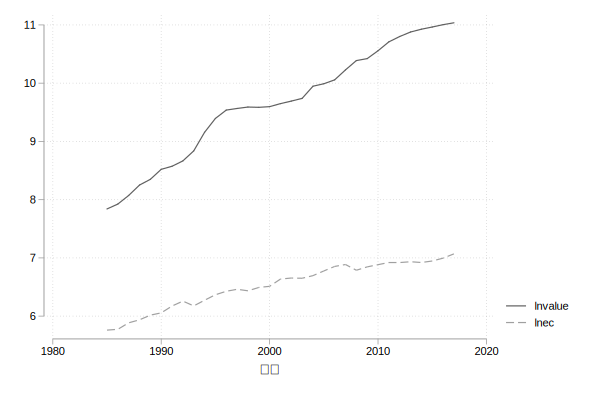

In [34]:
tsline  lnvalue lnec

### ADF检验

In [36]:
di 12*(33/100)^(1/4) // 计算最大滞后阶数

9.0951472


In [37]:
dfuller lnvalue, lags(4)  trend
dfuller D.lnvalue, lags(4) trend
dfuller D2.lnvalue, lags(4) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        28

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.359            -4.352            -3.588            -3.233
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.4019


Augmented Dickey-Fuller test for unit root         Number of obs   =        27

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

In [38]:
dfuller lnec, lags(4) trend
dfuller D.lnec, lags(4) trend
dfuller D2.lnec, lags(4) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        28

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.216            -4.352            -3.588            -3.233
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9072


Augmented Dickey-Fuller test for unit root         Number of obs   =        27

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

&emsp;&emsp;结果汇总为：

|变量|ADF检验结果|
|--|--|
|lnvalue|-2.359|
|lnec|-1.216|
|D1.lnvalue|-2.839|
|D1.lnec|-3.267|
|D2.lnvalue|-3.743**|
|D2.lnec|-4.965***|

** 以置信水平 5% 拒绝序列非平稳性的原假设

*** 以置信水平 1% 拒绝序列非平稳性的原假设

&emsp;&emsp;从检验结果来看，明显第一产业增加值的对数序列与电力消费的对数序列均为二阶单整序列，即 lnvalue ~ I(2)，lnec ~ I(2)，满足存在协整关系的前提条件。

## 协整检验

In [39]:
varsoc lnvalue lnec, nocons 
vecrank lnvalue lnec, max lags(2)



   Selection-order criteria
   Sample:  1989 - 2017                         Number of obs      =        29
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  1 |  80.9789       .    4      .  .000017  -5.30889  -5.24982* -5.12029* |
  |  2 |  85.0884   8.219    4  0.084  .000017* -5.31644* -5.19831  -4.93925  |
  |  3 |  87.4898  4.8029    4  0.308  .000019  -5.20619    -5.029  -4.64042  |
  |  4 |  90.6159  6.2521    4  0.181  .000021  -5.14592  -4.90966  -4.39155  |
  +---------------------------------------------------------------------------+
   Endogenous:  lnvalue lnec
    Exogenous:  


                       Johansen tests for cointegration                        
Trend: constant                                         Number of obs =      31
Sample:  1987 - 2017                       

&emsp;&emsp;从检验结果来看，在 5% 的临界值水平上无法拒绝协整秩为 0 的假设，因此第一产业增加值与用电量之间不存在协整关系。

# 第二产业增加值与用电量

## 数据处理

### 导入数据

In [40]:
clear all // 清空内存
import excel using "E:\求职\笔试\GDP和用电量.xlsx", sheet("第二产业增加值与用电量") firstrow clear // 导入数据
list in 1/10 // 展示前 10 个数据
ds, detail // 查看变量详细情况 





     +---------------------------+
     | year   value_~d        ec |
     |---------------------------|
  1. | 1985     3886.4    3354.6 |
  2. | 1986     4515.1    3702.3 |
  3. | 1987     5273.8    4064.2 |
  4. | 1988     6607.2    4427.3 |
  5. | 1989     7300.7    4711.7 |
     |---------------------------|
  6. | 1990     7744.1    4938.3 |
  7. | 1991     9129.6    5334.4 |
  8. | 1992      11725    5912.9 |
  9. | 1993    16472.7    6590.5 |
 10. | 1994    22452.5   7132.64 |
     +---------------------------+


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year            int     %10.0g                year
value_added     double  %10.0g                value_added
ec

### 处理数据

In [41]:
label data "数据来源：国家统计局和中国统计年鉴"
label var year "年份"
label var value_added "第二产业增加值（亿元）"
label var ec "用电量（亿千瓦时）"

In [42]:
format year %ty
tsset year



        time variable:  year, 1985 to 2017
                delta:  1 year


In [43]:
gen lnvalue = log(value_added)
gen lnec = log(ec)

## 平稳性：单位根检验

### 图示法：简单查看

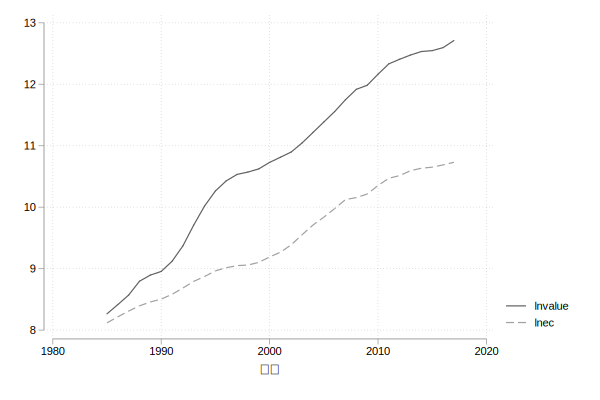

In [46]:
tsline  lnvalue lnec

### 单位根检验：ADF 和 PP

#### ADF 检验

In [47]:
dfuller lnvalue, lags(1)  trend
dfuller D.lnvalue, lags(1) trend
dfuller D2.lnvalue, lags(1) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        31

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.567            -4.325            -3.576            -3.226
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.2955


Augmented Dickey-Fuller test for unit root         Number of obs   =        30

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

In [48]:
dfuller lnec, lags(1) trend
dfuller D.lnec, lags(1) trend
dfuller D2.lnec, lags(1) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        31

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.343            -4.325            -3.576            -3.226
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.4103


Augmented Dickey-Fuller test for unit root         Number of obs   =        30

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

#### PP检验

In [49]:
pperron lnvalue, lags(5) trend
pperron D.lnvalue, lags(5) trend
pperron D2.lnvalue, lags(5) trend



Phillips-Perron test for unit root                 Number of obs   =        32
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(rho)           -3.068           -23.396           -18.432           -15.936
 Z(t)             -1.012            -4.316            -3.572            -3.223
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9424


Phillips-Perron test for unit root                 Number of obs   =        31
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------


In [50]:
pperron lnec, lags(5) trend
pperron D.lnec, lags(5) trend
pperron D2.lnec, lags(5) trend



Phillips-Perron test for unit root                 Number of obs   =        32
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(rho)           -6.732           -23.396           -18.432           -15.936
 Z(t)             -1.712            -4.316            -3.572            -3.223
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.7456


Phillips-Perron test for unit root                 Number of obs   =        31
                                                   Newey-West lags =         5

                               ---------- Interpolated Dickey-Fuller ---------


#### 汇总结果

|变量|ADF检验值|PP检验值|
|--|--|--|
|lnvalue|-2.567|-1.012|
|lnec|-2.343|-1.712|
|D1.lnvalue|-3.322|-2.425|
|D1.lnec|-2.671|-2.637|
|D2.lnvalue|-4.394***|-4.33**|
|D2.lnec|-5.856***|-5.98***|

** 以置信水平 5% 拒绝序列非平稳性的原假设

*** 以置信水平 1% 拒绝序列非平稳性的原假设

&emsp;&emsp;从检验结果来看，明显第二产业增加值的对数序列与电力消费的对数序列均为二阶单整序列，即 lnvalue ~ I(2)，lnec ~ I(2)，满足存在协整关系的前提条件。

## 协整检验

In [52]:
varsoc lnvalue lnec, nocons 


   Selection-order criteria
   Sample:  1989 - 2017                         Number of obs      =        29
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  1 |  90.9222       .    4      .  8.5e-06  -5.99463  -5.93557  -5.80604  |
  |  2 |  107.392   32.94*   4  0.000  3.6e-06  -6.85463   -6.7365* -6.47745* |
  |  3 |  111.548  8.3119    4  0.081  3.6e-06* -6.86539*  -6.6882  -6.29961  |
  |  4 |  114.004  4.9127    4  0.296  4.1e-06  -6.75893  -6.52267  -6.00456  |
  +---------------------------------------------------------------------------+
   Endogenous:  lnvalue lnec
    Exogenous:  


In [60]:
vecrank lnvalue lnec, max lags(2)


                       Johansen tests for cointegration                        
Trend: constant                                         Number of obs =      31
Sample:  1987 - 2017                                             Lags =       2
-------------------------------------------------------------------------------
                                                         5%
maximum                                      trace    critical
  rank    parms       LL       eigenvalue  statistic    value
    0      6       113.75513           .      8.1538*   15.41
    1      9       116.77498     0.17702      2.1141     3.76
    2      10      117.83203     0.06592
-------------------------------------------------------------------------------
                                                         5%
maximum                                       max     critical
  rank    parms       LL       eigenvalue  statistic    value
    0      6       113.75513           .      6.0397    14.07
  

&emsp;&emsp;从检验结果来看，在 5% 的临界值水平上无法拒绝协整秩为 0 的假设，因此第二产业增加值与用电量之间不存在协整关系。

# 第三产业增加值与用电量

## 导入和处理数据 

### 导入数据

In [61]:
clear all // 清空内存
import excel using "E:\求职\笔试\GDP和用电量.xlsx", sheet("第三产业增加值与用电量") firstrow clear // 导入数据
list in 1/10 // 展示前 10 个数据
ds, detail // 查看变量详细情况 





     +--------------------------+
     | year   value_~d       ec |
     |--------------------------|
  1. | 1985     2670.8    223.1 |
  2. | 1986       3097    234.9 |
  3. | 1987     3696.3    274.9 |
  4. | 1988       4742    317.3 |
  5. | 1989     5650.8    347.9 |
     |--------------------------|
  6. | 1990     6111.6    384.5 |
  7. | 1991     7587.2    446.2 |
  8. | 1992     9669.2    513.9 |
  9. | 1993      12313    617.9 |
 10. | 1994    16713.1   730.18 |
     +--------------------------+


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year            int     %10.0g                year
value_added     double  %10.0g                value_added
ec              d

### 处理数据

In [62]:
label data "数据来源：国家统计局和中国统计年鉴"
label var year "年份"
label var value_added "第三产业增加值（亿元）"
label var ec "用电量（亿千瓦时）"

In [63]:
format year %ty
tsset year



        time variable:  year, 1985 to 2017
                delta:  1 year


In [64]:
gen lnvalue = log(value_added)
gen lnec = log(ec)

## 平稳性：单位根检验

### 图示法：简单查看数据的平稳性

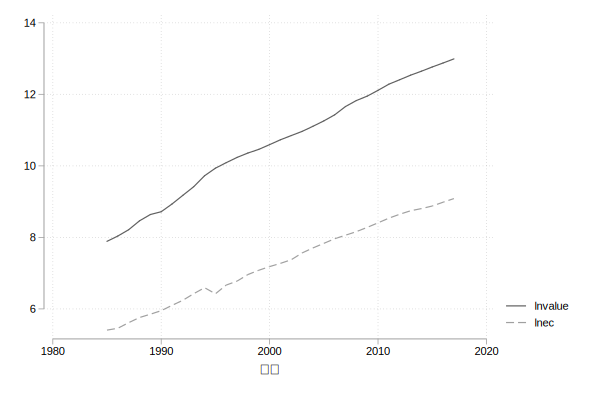

In [68]:
tsline  lnvalue lnec

### ADF 检验

In [69]:
dfuller lnvalue, lags(8)  trend
dfuller D.lnvalue, lags(8) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        24

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.102            -4.380            -3.600            -3.240
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.5450


Augmented Dickey-Fuller test for unit root         Number of obs   =        23

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

In [70]:
dfuller lnec, lags(4) trend
dfuller D.lnec, lags(4) trend



Augmented Dickey-Fuller test for unit root         Number of obs   =        28

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -0.673            -4.352            -3.588            -3.233
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9748


Augmented Dickey-Fuller test for unit root         Number of obs   =        27

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z

&emsp;&emsp;结果整理如下：

|变量|ADF检验值|
|--|--|
|lnvalue|-2.102|
|lnec|-0.673|
|D1.lnvalue|-3.95**|
|D1.lnec|-3.619**|

** 以置信水平 5% 拒绝序列非平稳性的原假设

&emsp;&emsp;从检验结果来看，明显第二产业增加值的对数序列与电力消费的对数序列均为一阶单整序列，即 lnvalue ~ I(1)，lnec ~ I(1)，满足存在协整关系的前提条件。

## 协整检验

In [72]:
varsoc lnvalue lnec, nocons 


   Selection-order criteria
   Sample:  1989 - 2017                         Number of obs      =        29
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  1 |  79.2943       .    4      .  .000019  -5.19271  -5.13365  -5.00412  |
  |  2 |  94.3864  30.184    4  0.000  8.9e-06* -5.95768* -5.83955*  -5.5805* |
  |  3 |  94.7104  .64808    4  0.958  .000012  -5.70417  -5.52697  -5.13839  |
  |  4 |   101.35  13.279*   4  0.010  9.8e-06  -5.88619  -5.64993  -5.13182  |
  +---------------------------------------------------------------------------+
   Endogenous:  lnvalue lnec
    Exogenous:  


In [78]:
vecrank lnvalue lnec, trend(rc) max lags(2)


                       Johansen tests for cointegration                        
Trend: rconstant                                        Number of obs =      31
Sample:  1987 - 2017                                             Lags =       2
-------------------------------------------------------------------------------
                                                         5%
maximum                                      trace    critical
  rank    parms       LL       eigenvalue  statistic    value
    0      4       90.359129           .     33.0583    19.96
    1      8       102.69394     0.54878      8.3887*    9.42
    2      10      106.88828     0.23708
-------------------------------------------------------------------------------
                                                         5%
maximum                                       max     critical
  rank    parms       LL       eigenvalue  statistic    value
    0      4       90.359129           .     24.6696    15.67
  

&emsp;&emsp;上述结果表明两个变量之间存在一个协整关系。

## 格兰杰因果检验

In [80]:
qui var lnvalue lnec, lags(2)
vargranger




   Granger causality Wald tests
  +------------------------------------------------------------------+
  |          Equation           Excluded |   chi2     df Prob > chi2 |
  |--------------------------------------+---------------------------|
  |           lnvalue               lnec |  6.3516     1    0.012    |
  |           lnvalue                ALL |  6.3516     1    0.012    |
  |--------------------------------------+---------------------------|
  |              lnec            lnvalue |  3.5067     1    0.061    |
  |              lnec                ALL |  3.5067     1    0.061    |
  +------------------------------------------------------------------+


&emsp;&emsp;由上述结果可知：在 5% 的显著性水平中，第三产业增加值与用电量之间是从用电量到第三产业增加值的单向因果关系。

## 误差修正模型

In [79]:
vec lnvalue lnec, lags(2) rank(1)


Vector error-correction model

Sample:  1987 - 2017                            Number of obs     =         31
                                                AIC               =  -6.185553
Log likelihood =  104.8761                      HQIC              =  -6.049843
Det(Sigma_ml)  =  3.95e-06                      SBIC              =  -5.769234

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
D_lnvalue             4     .039152   0.9527   543.8054   0.0000
D_lnec                4     .062252   0.8109   115.7903   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
D_lnvalue    |
        _ce1 |
         L1. |     -0.132      0.044    -2.98   0.003     

&emsp;&emsp;因此所得的误差修正模型为：

$$
lnvalue -1.24 lnec - 2.743 = 0
$$

&emsp;&emsp;根据误差修正模型，从长期来看， lnec 与 lngdp 存在正相关关系：lnec 每增长一个单位， lngdp 增长 1.24 个单位。